In [ ]:
!pip install torch torchvision





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install detecto


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir totest
! mkdir results

In [ ]:
import ffmpeg

YOUR_FILE = '/content/Solent_Parling_Final.mp4'
probe = ffmpeg.probe(YOUR_FILE)
time = float(probe['streams'][0]['duration'])//1
width = probe['streams'][0]['width']

# Set how many spots you want to extract a video from.
parts = 10

intervals = time // parts
intervals = int(intervals)
interval_list = [(i * intervals, (i + 1) * intervals) for i in range(parts)]
i = 0

for item in interval_list:
    (
        ffmpeg
        .input(YOUR_FILE, ss=item[1])
        .filter('scale', width, -1)
        .output('/content/totest/Image' + str(i) + '.jpg', vframes=1)
        .run()
    )
    i += 1

In [ ]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [ ]:
!unzip Resources.zip

Archive:  Resources.zip
  inflating: Solent_new.mp4          
  inflating: Test/25.jpeg            
  inflating: Test/26.jpeg            
  inflating: Test/26.xml             
  inflating: Test/27.jpeg            
  inflating: Test/27.xml             
  inflating: Test/6.jpeg             
  inflating: Test/6.xml              
  inflating: Test/7.jpeg             
  inflating: Test/7.xml              
  inflating: Test/Solent_Parking2_cropped - Copy (2).jpg  
  inflating: Test/Solent_Parking2_cropped - Copy (2).xml  
  inflating: Test/Solent_parking3 - Copy (2).png  
  inflating: Test/Solent_parking3 - Copy (2).xml  
  inflating: Test/Solent_parking4 - Copy (2).png  
  inflating: Test/Solent_parking4 - Copy (2).xml  
  inflating: Test/Solent_Praking_cropped - Copy (2).jpg  
  inflating: Train/10.jpeg           
  inflating: Train/10.xml            
  inflating: Train/11.jpeg           
  inflating: Train/11.xml            
  inflating: Train/13.jpeg           
  inflating: Train/14.jpeg

In [ ]:
!unzip Test.zip -d "/content/Test"

Archive:  Test.zip
  inflating: /content/Test/25.jpeg   
  inflating: /content/Test/26.jpeg   
  inflating: /content/Test/26.xml    
  inflating: /content/Test/27.jpeg   
  inflating: /content/Test/27.xml    
  inflating: /content/Test/6.jpeg    
  inflating: /content/Test/6.xml     
  inflating: /content/Test/7.jpeg    
  inflating: /content/Test/7.xml     
  inflating: /content/Test/Solent_Parking2_cropped - Copy (2).jpg  
  inflating: /content/Test/Solent_Parking2_cropped - Copy (2).xml  
  inflating: /content/Test/Solent_parking3 - Copy (2).png  
  inflating: /content/Test/Solent_parking3 - Copy (2).xml  
  inflating: /content/Test/Solent_parking4 - Copy (2).png  
  inflating: /content/Test/Solent_parking4 - Copy (2).xml  
  inflating: /content/Test/Solent_Praking_cropped - Copy (2).jpg  


In [ ]:
!unzip Train.zip -d "/content/Train"

Archive:  Train.zip
  inflating: /content/Train/10.jpeg  
  inflating: /content/Train/10.xml   
  inflating: /content/Train/11.jpeg  
  inflating: /content/Train/11.xml   
  inflating: /content/Train/13.jpeg  
  inflating: /content/Train/14.jpeg  
  inflating: /content/Train/14.xml   
  inflating: /content/Train/15.jpeg  
  inflating: /content/Train/15.xml   
  inflating: /content/Train/17.jpeg  
  inflating: /content/Train/18.jpeg  
  inflating: /content/Train/18.xml   
  inflating: /content/Train/19.jpeg  
  inflating: /content/Train/19.xml   
  inflating: /content/Train/2.jpeg   
  inflating: /content/Train/2.xml    
  inflating: /content/Train/20.jpeg  
  inflating: /content/Train/20.xml   
  inflating: /content/Train/21.jpeg  
  inflating: /content/Train/21.xml   
  inflating: /content/Train/22.jpeg  
  inflating: /content/Train/22.xml   
  inflating: /content/Train/23.jpeg  
  inflating: /content/Train/24.jpeg  
  inflating: /content/Train/24.xml   
  inflating: /content/Train/28

In [ ]:
Train_dataset=core.Dataset("/content/Train/",transform=custom_transforms)#L1
Test_dataset = core.Dataset("/content/Test/")#L2
loader=core.DataLoader(Train_dataset, batch_size=2, shuffle=True)#L3
model = core.Model(['Available'])#L4
losses = model.fit(loader, Test_dataset, epochs=25, lr_step_size=5, learning_rate=0.001, verbose=True)#L5

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:13<00:00,  1.12s/it]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.92it/s]


Loss: 0.5458833681685584
Epoch 2 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.82it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Loss: 0.5206647132124219
Epoch 3 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.83it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.85it/s]


Loss: 0.48073413223028183
Epoch 4 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.77it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.96it/s]


Loss: 0.51032426740442
Epoch 5 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.82it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.76it/s]


Loss: 0.5003892311028072
Epoch 6 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.75it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.95it/s]


Loss: 0.5001848978655679
Epoch 7 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.79it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


Loss: 0.4945189708045551
Epoch 8 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.77it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.98it/s]


Loss: 0.4898392696465765
Epoch 9 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.78it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  6.02it/s]


Loss: 0.5074740328959056
Epoch 10 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.78it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.98it/s]


Loss: 0.49710442977292196
Epoch 11 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.79it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  6.01it/s]


Loss: 0.4964227963771139
Epoch 12 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.80it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.94it/s]


Loss: 0.49336280886616024
Epoch 13 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.78it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.81it/s]


Loss: 0.48637230694293976
Epoch 14 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.78it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Loss: 0.4932978195803506
Epoch 15 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.78it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  6.00it/s]


Loss: 0.49378679586308344
Epoch 16 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.80it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  6.06it/s]


Loss: 0.5006445646286011
Epoch 17 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.79it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  6.00it/s]


Loss: 0.4930102037531989
Epoch 18 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.68it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.35it/s]


Loss: 0.4962617126958711
Epoch 19 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.78it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.41it/s]


Loss: 0.49274663414273945
Epoch 20 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.80it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.80it/s]


Loss: 0.5026785092694419
Epoch 21 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.73it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.05it/s]


Loss: 0.48972265315907343
Epoch 22 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.74it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.31it/s]


Loss: 0.48957035158361706
Epoch 23 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.76it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  6.09it/s]


Loss: 0.4966054441673415
Epoch 24 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:06<00:00,  1.82it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.72it/s]


Loss: 0.48913149003471645
Epoch 25 of 25
Begin iterating over training dataset


100%|██████████| 12/12 [00:07<00:00,  1.70it/s]


Begin iterating over validation dataset


100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

Loss: 0.49655911113534656


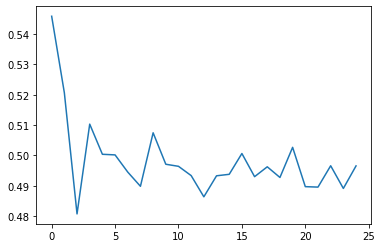

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
model.save('model_weights.pth')
model = core.Model.load('model_weights.pth', ['Available'])

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


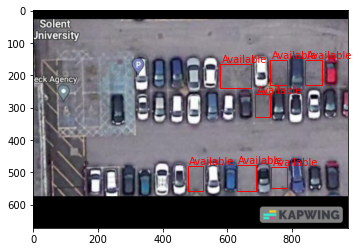

<class 'tuple'>


<ipython-input-23-db445da78936>:212: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  box = torch.tensor(box, dtype=torch.int)


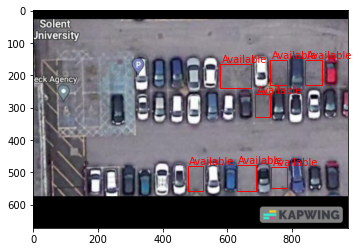

<class 'tuple'>


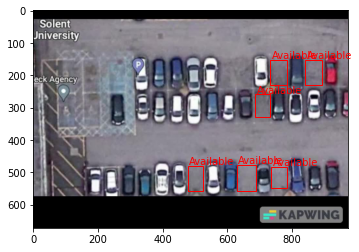

<class 'tuple'>


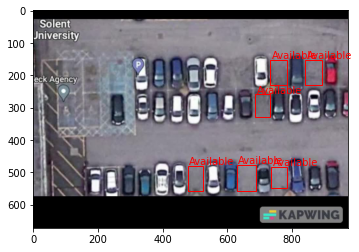

<class 'tuple'>


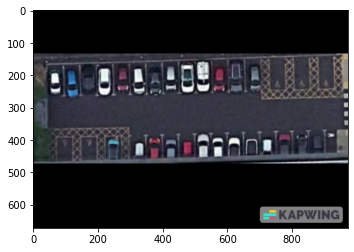

<class 'tuple'>


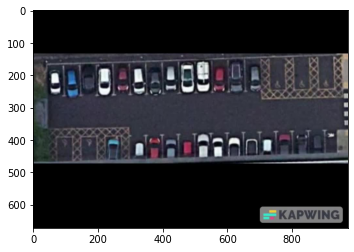

<class 'tuple'>


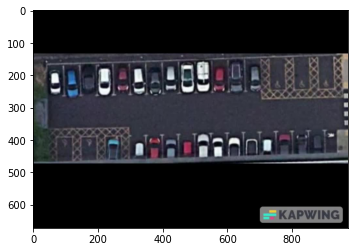

<class 'tuple'>


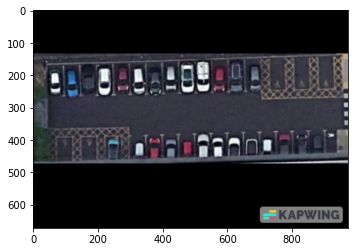

<class 'tuple'>


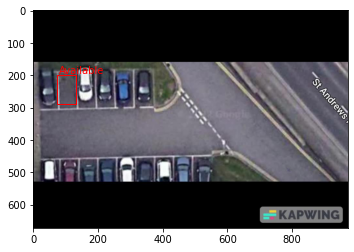

<class 'tuple'>


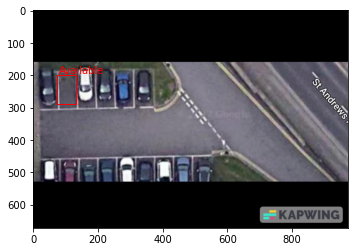

<class 'tuple'>


In [ ]:
# import required module
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import os
import cv2
f1 = open("Lot1.txt", "w")
f2 = open("Lot2.txt", "w")
f3 = open("Lot3.txt", "w")
# assign directory
directory = "/content/totest"

# iterate over files in
# that directory
i = 0
while(i < 10):
  f = "/content/totest/Image{}.jpg".format(i)
	# checking if it is a file
	#if os.path.isfile(f):
  image = utils.read_image(f)
  predictions = model.predict(image)
  #print(predictions)
  labels, boxes, scores = predictions
  #print(boxes)
  #show_labeled_image(image, boxes, labels)
  thresh=0.78
  filtered_indices=np.where(scores>thresh)
  filtered_scores=scores[filtered_indices]
  filtered_boxes=boxes[filtered_indices]
  x = filtered_boxes.tolist()
  #print(x)
  #print(x[0])
  num_list = filtered_indices[0].tolist()
  filtered_labels = [labels[i] for i in num_list]
  show_labeled_image(image, filtered_boxes, filtered_labels)
  #print(imagefinal)
  img = read_image(f)
  #print(x[0][0])
  print(type(tuple(x)))
  box = tuple(x)
  #print(box)
  for bb in box:
    if(i==0):
      if(bb[1]<197 and bb[3]>197):
        if(bb[0]<919 and bb[2]>919):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA1 Available")
        if(bb[0]<869 and bb[2]>869):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA2 Available")
        if(bb[0]<815 and bb[2]>815):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA3 Available")
        if(bb[0]<762 and bb[2]>762):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA4 Available")
        if(bb[0]<705 and bb[2]>705):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA5 Available")
        if(bb[0]<652 and bb[2]>652):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA6 Available")
        if(bb[0]<596 and bb[2]>596):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA7 Available")
        if(bb[0]<548 and bb[2]>548):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA8 Available")
        if(bb[0]<495 and bb[2]>495):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA9 Available")
        if(bb[0]<442 and bb[2]>442):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nA10 Available")
      elif(bb[1]<294 and bb[3]>294):
        if(bb[0]<919 and bb[2]>919):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB1 Available")
        if(bb[0]<869 and bb[2]>869):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB2 Available")
        if(bb[0]<815 and bb[2]>815):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB3 Available")
        if(bb[0]<762 and bb[2]>762):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB4 Available")
        if(bb[0]<705 and bb[2]>705):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB5 Available")
        if(bb[0]<652 and bb[2]>652):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB6 Available")
        if(bb[0]<596 and bb[2]>596):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB7 Available")
        if(bb[0]<548 and bb[2]>548):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB8 Available")
        if(bb[0]<495 and bb[2]>495):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB9 Available")
        if(bb[0]<442 and bb[2]>442):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nB10 Available")
      elif(bb[1]<522 and bb[3]>522):
        if(bb[0]<919 and bb[2]>919):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC1 Available")
        if(bb[0]<869 and bb[2]>869):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC2 Available")
        if(bb[0]<815 and bb[2]>815):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC3 Available")
        if(bb[0]<762 and bb[2]>762):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC4 Available")
        if(bb[0]<705 and bb[2]>705):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC5 Available")
        if(bb[0]<662 and bb[2]>662):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC6 Available")
        if(bb[0]<596 and bb[2]>596):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC7 Available")
        if(bb[0]<548 and bb[2]>548):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC8 Available")
        if(bb[0]<504 and bb[2]>504):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC9 Available")
        if(bb[0]<442 and bb[2]>442):
          with open('/content/Lot1.txt', 'a') as writefile:
            writefile.write("\nC10 Available")
    elif(i==4):
      if(bb[1]<186 and bb[3]>186):
        if(bb[0]<684 and bb[2]>684):
          with open('/content/Lot2.txt', 'a') as writefile:
            writefile.write("\nA1 Available")
        if(bb[0]<622 and bb[2]>622):
          with open('/content/Lot2.txt', 'a') as writefile:
            writefile.write("\nA2 Available")
        if(bb[0]<573 and bb[2]>573):
          with open('/content/Lot2.txt', 'a') as writefile:
            writefile.write("\nA3 Available")
        if(bb[0]<526 and bb[2]>526):
          with open('/content/Lot2.txt', 'a') as writefile:
            writefile.write("\nA4 Available")
        if(bb[0]<480 and bb[2]>480):
          with open('/content/Lot2.txt', 'a') as writefile:
            writefile.write("\nA5 Available")
    elif(i==8):
      if(bb[1]<252 and bb[3]>252):
        if(bb[0]<342 and bb[2]>342):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nA1 Available")
        if(bb[0]<283 and bb[2]>283):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nA2 Available")
        if(bb[0]<224 and bb[2]>224):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nA3 Available")
        if(bb[0]<165 and bb[2]>165):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nA4 Available")
        if(bb[0]<105 and bb[2]>105):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nA5 Available")
        if(bb[0]<49 and bb[2]>49):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nA6 Available")
      elif(bb[1]<499 and bb[3]>499):
        if(bb[0]<530 and bb[2]>530):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB1 Available")
        if(bb[0]<465 and bb[2]>465):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB2 Available")
        if(bb[0]<410 and bb[2]>410):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB3 Available")
        if(bb[0]<342 and bb[2]>342):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB4 Available")
        if(bb[0]<283 and bb[2]>283):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB5 Available")
        if(bb[0]<224 and bb[2]>224):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB6 Available")
        if(bb[0]<165 and bb[2]>165):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB7 Available")
        if(bb[0]<105 and bb[2]>105):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB8 Available")
        if(bb[0]<49 and bb[2]>49):
          with open('/content/Lot3.txt', 'a') as writefile:
            writefile.write("\nB9 Available")



  box = torch.tensor(box, dtype=torch.int)


# draw bounding box and fill color
  try:
    img = draw_bounding_boxes(img, box, width=5, colors="green", fill=True)
    # transform this image to PIL image
    img = torchvision.transforms.ToPILImage()(img)
    # save output frame
    img.save("/content/results/{}.jpg".format(i))

    i = i+1

  except:
    img = torchvision.transforms.ToPILImage()(img)
    img.save("/content/results/{}.jpg".format(i))
    "No spaces available."

    i = i + 1

In [ ]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import moviepy.video.io.ImageSequenceClip
image_folder='/content/results'
fps=1

image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               if img.endswith(".jpg")]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('/content/Meh.mp4')

[MoviePy] >>>> Building video /content/Meh.mp4
[MoviePy] Writing video /content/Meh.mp4


 91%|█████████ | 10/11 [00:00<00:00, 81.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/Meh.mp4 



In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('Meh.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)